In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean

In [89]:
data = pd.read_csv("/Users/haarithvohra/Downloads/Disaster Prediction/disaster_prediction.csv",sep=",", encoding="utf-8")

In [90]:
# removing columns we don't need
data.drop("choose_one:confidence", axis=1, inplace=True)
data.drop("choose_one_gold", axis=1, inplace=True)
data.drop_duplicates(subset="text", keep=False, inplace=True)
data.reset_index(inplace=True, drop=True)

In [91]:
data.head(10)

,choose_one,text
0,Relevant,Just happened a terrible car crash
1,Relevant,Our Deeds are the Reason of this #earthquake M...
2,Relevant,"Heard about #earthquake is different cities, s..."
3,Relevant,"there is a forest fire at spot pond, geese are..."
4,Relevant,Forest fire near La Ronge Sask. Canada
5,Relevant,All residents asked to 'shelter in place' are ...
6,Relevant,"13,000 people receive #wildfires evacuation or..."
7,Relevant,Just got sent this photo from Ruby #Alaska as ...
8,Relevant,#RockyFire Update => California Hwy. 20 closed...
9,Relevant,Apocalypse lighting. #Spokane #wildfires


In [92]:
data[data.choose_one == "Can't Decide"].count()

choose_one    14
text          14
dtype: int64

In [93]:
data[data.choose_one == "Relevant"].count()

choose_one    4456
text          4456
dtype: int64

In [94]:
data[data.choose_one == "Not Relevant"].count()


choose_one    6084
text          6084
dtype: int64

In [95]:
# This seems a little imbalanced, in favor towards Non Relevant disaster tweets. So we may consider taking out some

In [96]:
data.choose_one.count()

10554

In [97]:
# Average length of tweets 
AvgTwtLen = data["text"].str.len().mean()
print(AvgTwtLen)

101.14288421451582


In [98]:
dataRelevant = [data.text[i] for i in range(len(data)) if data.choose_one[i] == "Relevant"]
dataRelevant
len(dataRelevant[0])
lengthTweetsRel = [len(tweet) for tweet in dataRelevant]
RelAvgTwtLen = mean(lengthTweetsRel)
print(RelAvgTwtLen)

108.14407540394973


In [99]:
dataNotRelevant = [data.text[i] for i in range(len(data)) if data.choose_one[i] == "Not Relevant"]
dataNotRelevant
len(dataNotRelevant[0])
lengthTweetsNonRel = [len(tweet) for tweet in dataNotRelevant]
NonRelAvgTwtLen = mean(lengthTweetsNonRel)
print(NonRelAvgTwtLen)

96.09155161078237


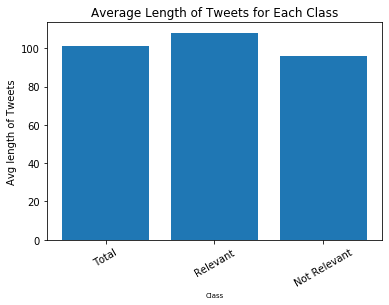

In [123]:
# Average number of tweets (Total, Relevant, Not Relevant)
label = ['Total', 'Relevant', 'Not Relevant']
values = [AvgTwtLen, RelAvgTwtLen, NonRelAvgTwtLen]

def plot_bar():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, values)
    plt.xlabel('Class', fontsize=7)
    plt.ylabel('Avg length of Tweets', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('Average Length of Tweets for Each Class')
    plt.show()
plot_bar()

In [109]:
# counting number of @s
countAt = 0
for i in range(len(data)):
    countAt += data.text[i].count('@')
print(countAt)

# counting number of #s
countHashtag = 0
for i in range(len(data)):
    countHashtag += data.text[i].count('#')
print(countHashtag)

countHttp = 0
for i in range(len(data)):
    tweet = data.text[i]
    for word in tweet.split():
        if word[:4] == 'http':
            countHttp += 1
print(countHttp)

3979
4693
6618


In [51]:
# countRT = 0
# for i in range(len(data)):
#     tweet = data.text[i]
#     for word in tweet.split():
#         if word[:2] == 'RT':
#             countRT += 1
# countRT

In [121]:
# counting number of @s
countAtRel = 0
for i in range(len(dataRelevant)):
    countAtRel += dataRelevant[i].count('@')
print(countAtRel)

# counting number of #s
countHashtagRel = 0
for i in range(len(dataRelevant)):
    countHashtagRel += dataRelevant[i].count('#')
print(countHashtagRel)

countHttpRel = 0
for i in range(len(dataRelevant)):
    tweet = dataRelevant[i]
    for word in tweet.split():
        if word[:4] == 'http':
            countHttpRel += 1
print(countHttpRel)

1258
2344
3493


In [119]:
# counting number of @s
countAtNotRel = 0
for i in range(len(dataNotRelevant)):
    countAtNotRel += dataNotRelevant[i].count('@')
print(countAtNotRel)

# counting number of #s
countHashtagNotRel = 0
for i in range(len(dataNotRelevant)):
    countHashtagNotRel += dataNotRelevant[i].count('#')
print(countHashtagNotRel)

countHttpNotRel = 0
for i in range(len(dataNotRelevant)):
    tweet = dataNotRelevant[i]
    for word in tweet.split():
        if word[:4] == 'http':
            countHttpNotRel += 1
print(countHttpNotRel)

2718
2344
3119


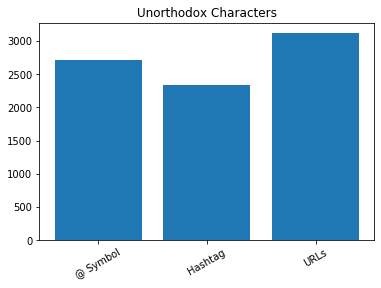

In [117]:
# Some preliminary analysis for Total Dataset
label = ['@ Symbol', 'Hashtag', 'URLs']
values = [countAt, countHashtag, countHttp]

def plot_bar():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, values)
#     plt.xlabel('Unorthodox Characters', fontsize=10)
#     plt.ylabel('Number of Mentions', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('Unorthodox Characters')
    plt.show()
plot_bar()

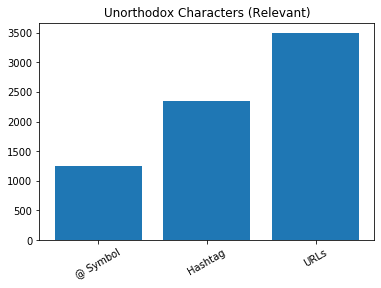

In [122]:
# Some preliminary analysis Not Relevant
label = ['@ Symbol', 'Hashtag', 'URLs']
values = [countAtRel, countHashtagRel, countHttpRel]

def plot_bar():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, values)
#     plt.xlabel('Unorthodox Characters', fontsize=10)
#     plt.ylabel('Number of Mentions', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('Unorthodox Characters (Relevant)')
    plt.show()
plot_bar()

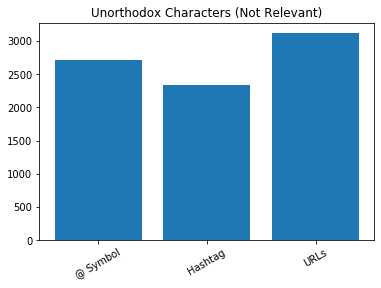

In [120]:
# Some preliminary analysis Not Relevant
label = ['@ Symbol', 'Hashtag', 'URLs']
values = [countAtNotRel, countHashtagNotRel, countHttpNotRel]

def plot_bar():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, values)
#     plt.xlabel('Unorthodox Characters', fontsize=10)
#     plt.ylabel('Number of Mentions', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('Unorthodox Characters (Not Relevant)')
    plt.show()
plot_bar()